# Sobel Operator

--- 7.471213102340698 seconds ---


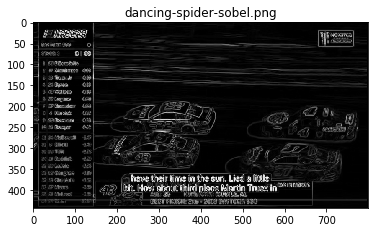

In [36]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time

# Open the image
img = np.array(Image.open('4cars800px.png')).astype(np.uint8)

start_time = time.time()

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Sobel Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newhorizontalImage = np.zeros((h, w))
newverticalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        newverticalImage[i - 1, j - 1] = abs(verticalGrad)

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

print("--- %s seconds ---" % (time.time() - start_time))
        
plt.figure()
plt.title('dancing-spider-sobel.png')
plt.imsave('dancing-spider-sobel.png', newgradientImage, cmap='gray', format='png')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

# Sobel Operator with RGB channels

--- 30.68628716468811 seconds ---


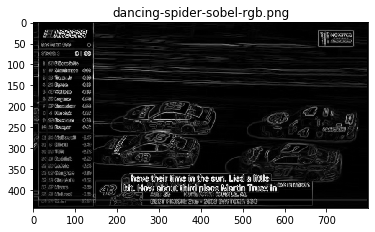

In [37]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('4cars800px.png')).astype(np.uint8)

# Sobel Operator
h, w, d = img.shape

start_time = time.time()

# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w, d))

# offset by 1
for channel in range(d):
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            horizontalGrad = (horizontal[0, 0] * img[i - 1, j - 1, channel]) + \
                             (horizontal[0, 1] * img[i - 1, j, channel]) + \
                             (horizontal[0, 2] * img[i - 1, j + 1, channel]) + \
                             (horizontal[1, 0] * img[i, j - 1, channel]) + \
                             (horizontal[1, 1] * img[i, j, channel]) + \
                             (horizontal[1, 2] * img[i, j + 1, channel]) + \
                             (horizontal[2, 0] * img[i + 1, j - 1, channel]) + \
                             (horizontal[2, 1] * img[i + 1, j, channel]) + \
                             (horizontal[2, 2] * img[i + 1, j + 1, channel])

            verticalGrad = (vertical[0, 0] * img[i - 1, j - 1, channel]) + \
                           (vertical[0, 1] * img[i - 1, j, channel]) + \
                           (vertical[0, 2] * img[i - 1, j + 1, channel]) + \
                           (vertical[1, 0] * img[i, j - 1, channel]) + \
                           (vertical[1, 1] * img[i, j, channel]) + \
                           (vertical[1, 2] * img[i, j + 1, channel]) + \
                           (vertical[2, 0] * img[i + 1, j - 1, channel]) + \
                           (vertical[2, 1] * img[i + 1, j, channel]) + \
                           (vertical[2, 2] * img[i + 1, j + 1, channel])

            # Edge Magnitude
            mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
            # Avoid underflow: clip result
            newgradientImage[i - 1, j - 1, channel] = mag

# now add the images r g and b
rgb_edge = newgradientImage[:,:,0] + newgradientImage[:,:,1] + newgradientImage[:,:,2]

print("--- %s seconds ---" % (time.time() - start_time))

plt.figure()
plt.title('dancing-spider-sobel-rgb.png')
plt.imsave('dancing-spider-sobel-rgb.png', rgb_edge, cmap='gray', format='png')
plt.imshow(rgb_edge, cmap='gray')
plt.show()

# Prewitt’s Operator

--- 7.074382066726685 seconds ---


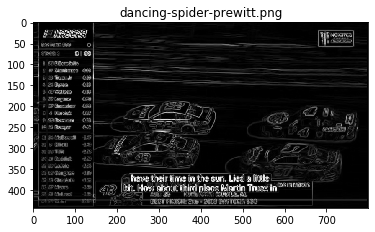

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time

# Open the image
img = np.array(Image.open('4cars800px.png')).astype(np.uint8)

start_time = time.time()

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Prewitt Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

print("--- %s seconds ---" % (time.time() - start_time))

plt.figure()
plt.title('dancing-spider-prewitt.png')
plt.imsave('dancing-spider-prewitt.png', newgradientImage, cmap='gray', format='png')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

# Laplacian Operator

--- 0.0019669532775878906 seconds ---


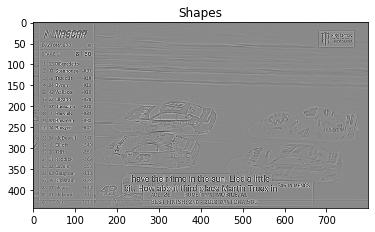

In [3]:
import cv2
import matplotlib.pyplot as plt

# Open the image
img = cv2.imread('4cars800px.png')

start_time = time.time()

# Apply gray scale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply gaussian blur
blur_img = cv2.GaussianBlur(gray_img, (3, 3), 0)

# Positive Laplacian Operator
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)

print("--- %s seconds ---" % (time.time() - start_time))

plt.figure()
plt.title('Shapes')
plt.imsave('shapes-lap.png', laplacian, cmap='gray', format='png')
plt.imshow(laplacian, cmap='gray')
plt.show()

# Canny Operator

--- 0.002376079559326172 seconds ---


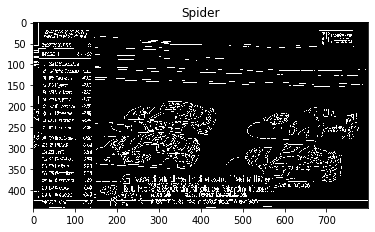

In [4]:
import cv2
import matplotlib.pyplot as plt

# Open the image
img = cv2.imread('4cars800px.png')

start_time = time.time()

# Apply Canny
edges = cv2.Canny(img, 100, 200, 3, L2gradient=True)

print("--- %s seconds ---" % (time.time() - start_time))

plt.figure()
plt.title('Spider')
plt.imsave('dancing-spider-canny.png', edges, cmap='gray', format='png')
plt.imshow(edges, cmap='gray')
plt.show()

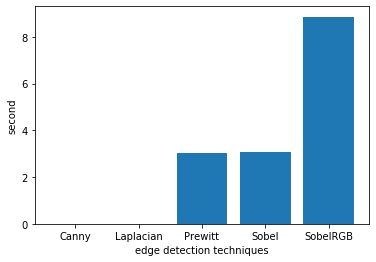

In [24]:
techniques = {'Sobel': 3.0601890087127686, 'SobelRGB': 8.856742858886719, 'Prewitt': 3.0104100704193115,
              'Laplacian': 0.0011129379272460938, 'Canny': 0.0014858245849609375}

plt.bar(*zip(*sorted(techniques.items())))
plt.ylabel('second')
plt.xlabel('edge detection techniques')
plt.show()

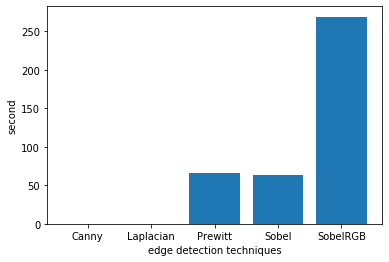

In [35]:
techniques = {'Sobel': 63.577555894851685, 'SobelRGB': 268.8599970340729, 'Prewitt': 66.52641701698303,
              'Laplacian': 0.015831947326660156, 'Canny': 0.011384010314941406}

plt.bar(*zip(*sorted(techniques.items())))
plt.ylabel('second')
plt.xlabel('edge detection techniques')
plt.show()